In [2]:
from IPython.display import Image

## Snail

##### Task:
Snail Sort
Given an n x n array, return the array elements arranged from outermost elements to the middle element, traveling clockwise.

array = [[1,2,3],
         [4,5,6],
         [7,8,9]]
snail(array) #=> [1,2,3,6,9,8,7,4,5] <br>
For better understanding, please follow the numbers of the next array consecutively:

array = [[1,2,3],
         [8,9,4],
         [7,6,5]]
snail(array) #=> [1,2,3,4,5,6,7,8,9]
###### This image will illustrate things more clearly:

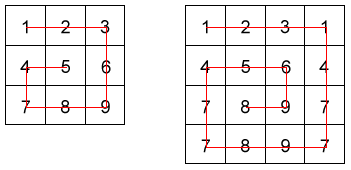

In [3]:
Image("http://www.haan.lu/files/2513/8347/2456/snail.png")

NOTE: The idea is not sort the elements from the lowest value to the highest; 
      the idea is to traverse the 2-d array in a clockwise snailshell pattern.

NOTE 2: The 0x0 (empty matrix) is represented as [[]]a<br>
https://www.codewars.com/kata/521c2db8ddc89b9b7a0000c1

##### Solution:

In [ ]:
import numpy as np
import itertools
def snail(array):
    arr, result = np.array(array), []
    if arr.any() and np.squeeze(arr).any():
        while np.squeeze(arr).any(): 
            result.append(list(arr[0]))
            arr = np.delete(arr, (0), axis=0)
            arr = np.rot90(arr) 
        return list(itertools.chain(*result))
    else: return []

## Most frequently used words in a text

##### Task:
Write a function that, given a string of text (possibly with punctuation and line-breaks), returns an array of the top-3 most occurring words, in descending order of the number of occurrences.

Assumptions:
A word is a string of letters (A to Z) optionally containing one or more apostrophes (') in ASCII. (No need to handle fancy punctuation.)
Matches should be case-insensitive, and the words in the result should be lowercased.
Ties may be broken arbitrarily.
If a text contains fewer than three unique words, then either the top-2 or top-1 words should be returned, or an empty array if a text contains no words.
https://www.codewars.com/kata/51e056fe544cf36c410000fb

##### Solution:

In [2]:
import re
from collections import Counter
def top_3_words(text):
    if len(text):
        all_words = re.findall(r"[a-z']+'?", text.lower())
        w_size = len(all_words)
        if w_size:
            if all_words[0] == "'" or all_words[0] == "\'\'\'": return []  
            dic_words = Counter(all_words)
            def ret(n):
                return [i[0] for i in dic_words.most_common(n)]
            if   w_size == 1: return ret(1)
            elif w_size == 2: return ret(2)
            else:             return ret(3)
        else: return []
    else: return []

## One Line Task: Palindrome String

##### Task:
Your task is to generate a palindrome string, using the specified length n, the specified characters c(all characters in c must be used at least once).<br>
Code length should less than: python 55 characters.<br>
https://www.codewars.com/kata/58b57f984f353b3dc9000030

##### Solution:

In [1]:
palindrome=lambda n,c:(c*n)[:n//2]+(c*n)[~-n//2::-1]

## One Line Task: Squirrel And Tree

##### Task:
Since the weather was good, some students decided to go for a walk in the park after the first lectures of the new academic year. There they saw a squirrel, which climbed a tree in a spiral at a constant angle to the ground. They calculated that in one loop the squirrel climbes h meters (vertical height), the height of the tree is equal to H, and the length of its circumference equals S.

These calculations were exhausting, so now the students need your help to figure out how many meters the path length of squirrel climbed when it reached the tree top. The result should be rounded to 4 decimal places

Code limit: Less than 52 characters (JavaScript & Python)<br>
https://www.codewars.com/kata/59016379ee5456d8cc00000f

##### Solution:

In [ ]:
squirrel=lambda h,H,S:round((H*H+(H*S/h)**2)**.5,4)